# Bioinformatics Project: BLAST Analysis of *Escherichia coli* Sequence

## Project Description
This project involves retrieving a nucleotide sequence from the NCBI GenBank database and performing a BLAST search to find similar sequences. The sequence used is from the bacterium *Escherichia coli*. The steps include:

1. Retrieving an *E. coli* sequence using BioPython's Entrez module.
2. Performing a BLAST search using the retrieved sequence.
3. Analyzing and interpreting the BLAST results.

The project demonstrates basic bioinformatics techniques essential for genomic research and data analysis.


**Importing necessary libraries**

In [1]:
from Bio import Entrez, SeqIO
from Bio.Blast import NCBIWWW, NCBIXML

In [2]:
# Setting up email address for Entrez (required by NCBI)
Entrez.email = "karkidholipankaj@gmail.com"

**Retrieving an *E. coli* Nucleotide Sequence**

In this step, we will retrieve a nucleotide sequence from the bacterium *Escherichia coli* using BioPython's Entrez module. The sequence will be used for subsequent BLAST analysis to find similar sequences. *E. coli* is a common model organism in microbiology and genetics studies, and its sequences are well-documented in databases like NCBI GenBank.


In [3]:
# Searching for E. coli sequences in NCBI GenBank
handle = Entrez.esearch(db="nucleotide", term="Escherichia coli[Organism]", retmax=1)
record = Entrez.read(handle)

# Retrieving the sequence using the accession number
accession_number = record["IdList"][0]
handle = Entrez.efetch(db="nucleotide", id=accession_number, rettype="fasta", retmode="text")
sequence = handle.read()

print(sequence)

>CP157248.1 Escherichia coli strain 2024CK-00535 plasmid unnamed5, complete sequence
TAATGGTACGCTGTATCCCGCGTTTGCCGTTCCCTCAGCCGATAACAGCCAGCTGGTCATCAGTGCACTG
ACCGATAAGGGGTTACGGTATGCAGGGTATGGTGTTGCCGTAAATCACGATGCAGACAGCCACATATCAC
CTGCGCCGGAACTTATGGAGTTTCATCTGAAAACCCGTGAGGCACCGCTTTTTGCTGCCGTCAACACACC
AGAAAAACAGCCGGATCATCTGTTCCGCTCTCTGGGTTTCAATCGTACCTGGGATGAATGGCGGCGCGAG
GAAGATGCAAGAACACACACCACCGAGAGGAGACATGATCGCGGTTGGTCACAGTGAATGTGAACAATAT
TTTGTTTTGTTTAACATCGTGTTATGTTCGTCGATGTTCTTCTATGTTCATCGACAGGGATGAATGCAAG
AAGCACACACATAATGCAAGCATAGTTTTGTTTTTCCGCCCCCAAAAATTGGGGGTTCTTTTTTCGCTGC
ATTAGAGCGCTTTTGACGCAATTTTTCACTTCAATAGTACCTTCGCACTACTAACACAAAAAAAACGCAG
CAGGGAGCGTTTTAGGTGCCTTAAAATCGATTTTAGATCGTCATCTTGATCTGTTTGTCTTCCTTGAAGC
GAAAATGCAGGGCTACAACCGTGCGCCCCTTTTTGATCGTCTCAACCGTTACAGCCAGGTCGCTTTTTTT
GTTCAGTTCGTCAACACAGGGTTTTATTAGTATTTTATTTAAGTCTCTGAATTGTTTGTATTTATTTTCA
ATCCCTAACATTGAACGAAAGTCATTAAGAGCAATAATTCTCTCTCCCGTACTGCGGAATTGCTGGAGGA
ACTCGTATATTCTTATACTGTAACTACTTGATAAACCTGATATGTTTTTTATAACAACGCGCG

In [4]:
from Bio.SeqUtils import gc_fraction
print("Sequence Length: ", len(sequence))
print("GC Percentage: ", round((gc_fraction(sequence) * 100), 2))

Sequence Length:  4217
GC Percentage:  49.87


We retrieved a nucleotide sequence for *Escherichia coli* using BioPython's Entrez module. The retrieved sequence corresponds to the *Escherichia coli* strain 2024CK-00535 plasmid unnamed5.

The sequence header is as follows:
>CP157248.1 Escherichia coli strain 2024CK-00535 plasmid unnamed5, complete sequence

The sequence contains a series of nucleotide bases (A, T, C, and G) representing the genetic information of the plasmid. This sequence will be used for subsequent BLAST analysis to find similar sequences.

Sequence Statistics:
- Length: 4217 base pairs
- GC Percentage: 49.87%



**Running BLAST Analysis**


In [5]:
# Performing BLAST analysis
result_handle = NCBIWWW.qblast("blastn", "nt", sequence)

**Parsing and Filtering BLAST Results**

In this step, we will parse the BLAST results to extract relevant information about each alignment. We will filter the alignments based on the E-value threshold to focus on significant matches.

In [6]:
from Bio.Blast import NCBIXML

# Parsing the BLAST results
blast_records = NCBIXML.parse(result_handle)

# Defining the maximum acceptable E-value, minimum identity percentage, and minimum bit score
max_evalue = 1e-5  #Maximum e-value
min_identity = 90  # Minimum identity percentage
min_bit_score = 50  # Minimum bit score

# List to store filtered alignments
filtered_alignments = []

# Iterate over each BLAST record
for blast_record in blast_records:
    # Iterate over each alignment in the record
    for alignment in blast_record.alignments:
        # Iterate over each HSP (High Scoring Pair) in the alignment
        for hsp in alignment.hsps:
            # Calculate the identity percentage
            identity_percentage = (hsp.identities / hsp.align_length) * 100
            # Filter alignments based on E-value, identity percentage, and bit score
            if hsp.expect <= max_evalue and identity_percentage >= min_identity and hsp.bits >= min_bit_score:
                # Add the alignment to the list of filtered alignments
                filtered_alignments.append(alignment)

# Print filtered alignments
print("Filtered Alignments:")
for alignment in filtered_alignments:
    print("Alignment title:", alignment.title)
    print("Alignment length:", alignment.length)
    for hsp in alignment.hsps:
        print("E-value:", hsp.expect)
        print("Bit score:", hsp.bits)
        print("Identity percentage:", (hsp.identities / hsp.align_length) * 100)
        print("Query start:", hsp.query_start)
        print("Query end:", hsp.query_end)
        print("Subject start:", hsp.sbjct_start)
        print("Subject end:", hsp.sbjct_end)
        print("Identity:", hsp.identities)
        print("Query sequence:", hsp.query)
        print("Subject sequence:", hsp.sbjct)
        print()

Filtered Alignments:
Alignment title: gi|2738668016|gb|CP157248.1| Escherichia coli strain 2024CK-00535 plasmid unnamed5, complete sequence
Alignment length: 4072
E-value: 0.0
Bit score: 7344.6
Identity percentage: 100.0
Query start: 1
Query end: 4072
Subject start: 1
Subject end: 4072
Identity: 4072
Query sequence: TAATGGTACGCTGTATCCCGCGTTTGCCGTTCCCTCAGCCGATAACAGCCAGCTGGTCATCAGTGCACTGACCGATAAGGGGTTACGGTATGCAGGGTATGGTGTTGCCGTAAATCACGATGCAGACAGCCACATATCACCTGCGCCGGAACTTATGGAGTTTCATCTGAAAACCCGTGAGGCACCGCTTTTTGCTGCCGTCAACACACCAGAAAAACAGCCGGATCATCTGTTCCGCTCTCTGGGTTTCAATCGTACCTGGGATGAATGGCGGCGCGAGGAAGATGCAAGAACACACACCACCGAGAGGAGACATGATCGCGGTTGGTCACAGTGAATGTGAACAATATTTTGTTTTGTTTAACATCGTGTTATGTTCGTCGATGTTCTTCTATGTTCATCGACAGGGATGAATGCAAGAAGCACACACATAATGCAAGCATAGTTTTGTTTTTCCGCCCCCAAAAATTGGGGGTTCTTTTTTCGCTGCATTAGAGCGCTTTTGACGCAATTTTTCACTTCAATAGTACCTTCGCACTACTAACACAAAAAAAACGCAGCAGGGAGCGTTTTAGGTGCCTTAAAATCGATTTTAGATCGTCATCTTGATCTGTTTGTCTTCCTTGAAGCGAAAATGCAGGGCTACAACCGTGCGCCCCTTTTTGATCGTCTCAACCGTTAC

**Summary of BLAST Results**

In this section, we summarize the significant BLAST alignments based on the filtering criteria (E-value, identity percentage, and bit score).


In [7]:
# Summary of filtered alignments
summary = []

# Iterate over each filtered alignment to extract key information
for alignment in filtered_alignments:
    for hsp in alignment.hsps:
        identity_percentage = (hsp.identities / hsp.align_length) * 100
        summary.append({
            "title": alignment.title,
            "length": alignment.length,
            "e_value": hsp.expect,
            "bit_score": hsp.bits,
            "identity_percentage": identity_percentage,
            "query_start": hsp.query_start,
            "query_end": hsp.query_end,
            "subject_start": hsp.sbjct_start,
            "subject_end": hsp.sbjct_end,
        })

# Displaying the summary
for record in summary:
    print(f"Alignment title: {record['title']}")
    print(f"Alignment length: {record['length']}")
    print(f"E-value: {record['e_value']}")
    print(f"Bit score: {record['bit_score']}")
    print(f"Identity percentage: {record['identity_percentage']:.2f}%")
    print(f"Query start: {record['query_start']}, Query end: {record['query_end']}")
    print(f"Subject start: {record['subject_start']}, Subject end: {record['subject_end']}")
    print()


Alignment title: gi|2738668016|gb|CP157248.1| Escherichia coli strain 2024CK-00535 plasmid unnamed5, complete sequence
Alignment length: 4072
E-value: 0.0
Bit score: 7344.6
Identity percentage: 100.00%
Query start: 1, Query end: 4072
Subject start: 1, Subject end: 4072

Alignment title: gi|2388985681|gb|CP113491.1| Escherichia coli strain GTEN_23 plasmid unnamed5, complete sequence
Alignment length: 4072
E-value: 0.0
Bit score: 7339.19
Identity percentage: 100.00%
Query start: 1, Query end: 4069
Subject start: 4069, Subject end: 1

Alignment title: gi|2581309517|gb|CP134665.1| Escherichia coli strain 64A:C plasmid unnamed6, complete sequence
Alignment length: 8146
E-value: 0.0
Bit score: 7232.8
Identity percentage: 99.39%
Query start: 1, Query end: 4072
Subject start: 3250, Subject end: 7323

Alignment title: gi|2581309517|gb|CP134665.1| Escherichia coli strain 64A:C plasmid unnamed6, complete sequence
Alignment length: 8146
E-value: 0.0
Bit score: 5788.3
Identity percentage: 99.51%
Qu

**Visualizing BLAST Results**

In this section, we visualize the distribution of E-values, bit scores, and identity percentages from the significant BLAST alignments.


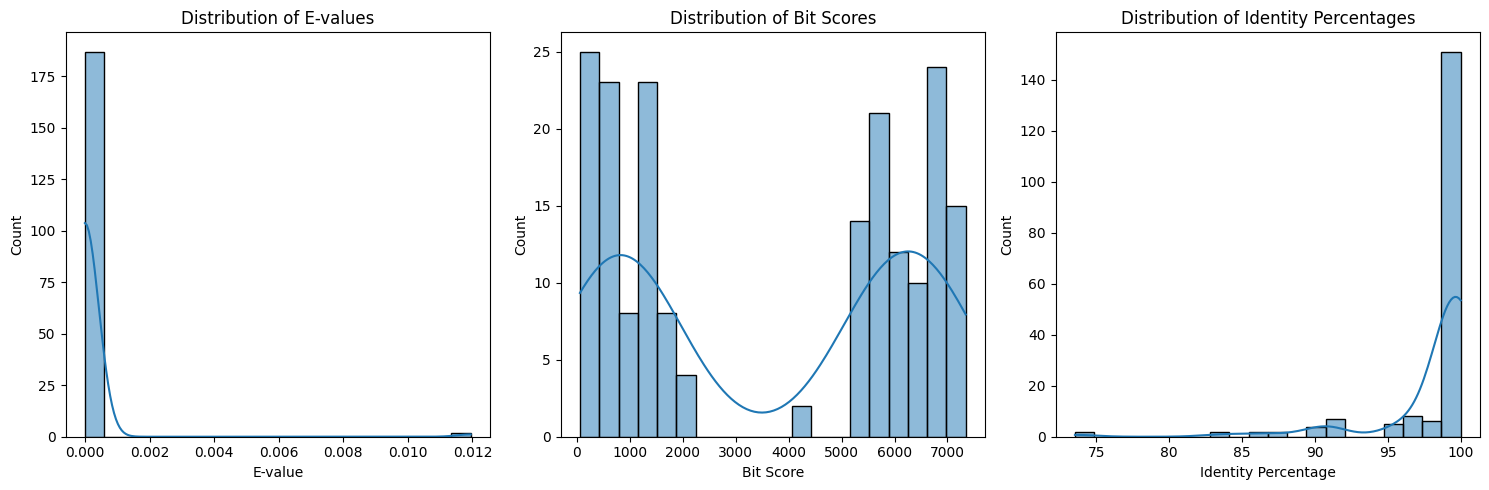

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting data for visualization
e_values = [record['e_value'] for record in summary]
bit_scores = [record['bit_score'] for record in summary]
identity_percentages = [record['identity_percentage'] for record in summary]

plt.figure(figsize=(15, 5))

# Plotting the distribution of E-values
plt.subplot(1, 3, 1)
sns.histplot(e_values, bins=20, kde=True)
plt.xlabel('E-value')
plt.title('Distribution of E-values')

# Plotting the distribution of Bit Scores
plt.subplot(1, 3, 2)
sns.histplot(bit_scores, bins=20, kde=True)
plt.xlabel('Bit Score')
plt.title('Distribution of Bit Scores')

# Plotting the distribution of Identity Percentages
plt.subplot(1, 3, 3)
sns.histplot(identity_percentages, bins=20, kde=True)
plt.xlabel('Identity Percentage')
plt.title('Distribution of Identity Percentages')

plt.tight_layout()
plt.show()

The analysis of the distribution plots for E-values, bit scores, and identity percentages provides valuable insights into the significance and similarity of the obtained alignments. The E-value distribution reveals the presence of highly significant alignments with very low E-values, indicating strong matches. Additionally, the distribution of bit scores highlights the prevalence of alignments with high similarity, particularly in certain score ranges. Similarly, the distribution of identity percentages indicates a substantial number of alignments with identical sequences, emphasizing the overall similarity between sequences. These distribution patterns offer valuable information for understanding the quality and significance of the sequence alignments obtained from the BLAST analysis, facilitating further interpretation and biological insights.

**Processing BLAST Results and Alignment**

This code snippet assumes that `result_handle` is a StringIO object containing BLAST XML results. The script first resets the cursor of the StringIO object to the beginning using `result_handle.seek(0)`. Then, it parses the BLAST XML results using `SearchIO.parse(result_handle, "blast-xml")` and stores the parsed records in `blast_records`. Next, it selects the best hit from the BLAST results and prints its ID and description. Finally, it extracts the alignment between the query sequence (CP157248.1) and the best hit sequence (CP113491.1)


In [69]:

# Assuming result_handle is StringIO object containing BLAST XML results
result_handle.seek(0)  # Reset the StringIO object's cursor to the beginning
blast_records = SearchIO.parse(result_handle, "blast-xml")

best_hit = blast_result[1]
print(best_hit)
print(best_hit.id)
print(best_hit.description)

print()

# Perform the alignment
alignment = best_hit.hsps[0].aln
print(alignment)

Query: CP157248.1
       Escherichia coli strain 2024CK-00535 plasmid unnamed5, complete sequence
  Hit: gi|2388985681|gb|CP113491.1| (4072)
       Escherichia coli strain GTEN_23 plasmid unnamed5, complete sequence
 HSPs: ----  --------  ---------  ------  ---------------  ---------------------
          #   E-value  Bit score    Span      Query range              Hit range
       ----  --------  ---------  ------  ---------------  ---------------------
          0         0    7339.19    4069         [0:4069]               [0:4069]
gi|2388985681|gb|CP113491.1|
Escherichia coli strain GTEN_23 plasmid unnamed5, complete sequence

Alignment with 2 rows and 4069 columns
TAATGGTACGCTGTATCCCGCGTTTGCCGTTCCCTCAGCCGATA...CCG CP157248.1
TAATGGTACGCTGTATCCCGCGTTTGCCGTTCCCTCAGCCGATA...CCG gi|2388985681|gb|CP113491.1|


### Conclusion

In this project, I utilized Biopython to parse BLAST XML results and extract significant alignments. I visualized key parameters such as E-value, bit score, and identity percentage using bar plots, and performed pairwise alignment between the query sequence and the best hit from BLAST. Additionally, I explored different visualization methods for the alignment, aiming to illustrate sequence similarities and differences effectively.

### Importance of BLAST in Bioinformatics

BLAST (Basic Local Alignment Search Tool) is a fundamental tool in bioinformatics for comparing biological sequences. It allows researchers to identify similar sequences in large databases, providing valuable insights into evolutionary relationships, functional annotations, and genetic variations. BLAST facilitates various analyses, including genome annotation, gene discovery, and phylogenetic studies, making it an indispensable resource for understanding the structure and function of biological molecules.
